**MY CNN AND SVM**

In [ ]:
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import time
from tensorflow.keras.callbacks import LearningRateScheduler

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = y_train.flatten()
y_test = y_test.flatten()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(1024, (1, 1), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(10, (1, 1), activation='softmax'),
    tf.keras.layers.Flatten()
])

CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

def learning_rate_scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

start_time = time.time()
history = CNN.fit(x_train, y_train, epochs=50, batch_size=64,
                  validation_data=(x_val, y_val), callbacks=[lr_scheduler])
end_time = time.time()

print(f"Training time: {end_time - start_time:.2f} seconds")

train_features = CNN.predict(x_train)
val_features = CNN.predict(x_val)
test_features = CNN.predict(x_test)

C_value = 10
gamma_value = 'scale'
print(f"Training SVM with RBF kernel, C={C_value}, gamma={gamma_value}...")
svm_rbf3 = SVC(kernel='rbf', C=C_value, gamma=gamma_value, decision_function_shape='ovr')
svm_rbf3.fit(train_features, y_train)

# Validate the SVM model
val_predictions = svm_rbf3.predict(val_features)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Test the SVM model
test_predictions = svm_rbf3.predict(test_features)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



c:\Users\kkate\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.0173 - loss: 4.9023 - val_accuracy: 0.0787 - val_loss: 4.6439 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.0325 - loss: 4.6777 - val_accuracy: 0.0970 - val_loss: 4.5620 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.0454 - loss: 4.5913 - val_accuracy: 0.0924 - val_loss: 4.5185 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.0513 - loss: 4.5551 - val_accuracy: 0.0937 - val_loss: 4.5086 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.0600 - loss: 4.5062 - val_accuracy: 0.0903 - val_loss: 4.4460 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.0723 - loss: 4.4776 - val_accuracy: 0.1111 - val_loss: 4.4087 - learning_rate: 9.0484e-04
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.0776

Correctly classified examples: 6552
Misclassified examples: 3448


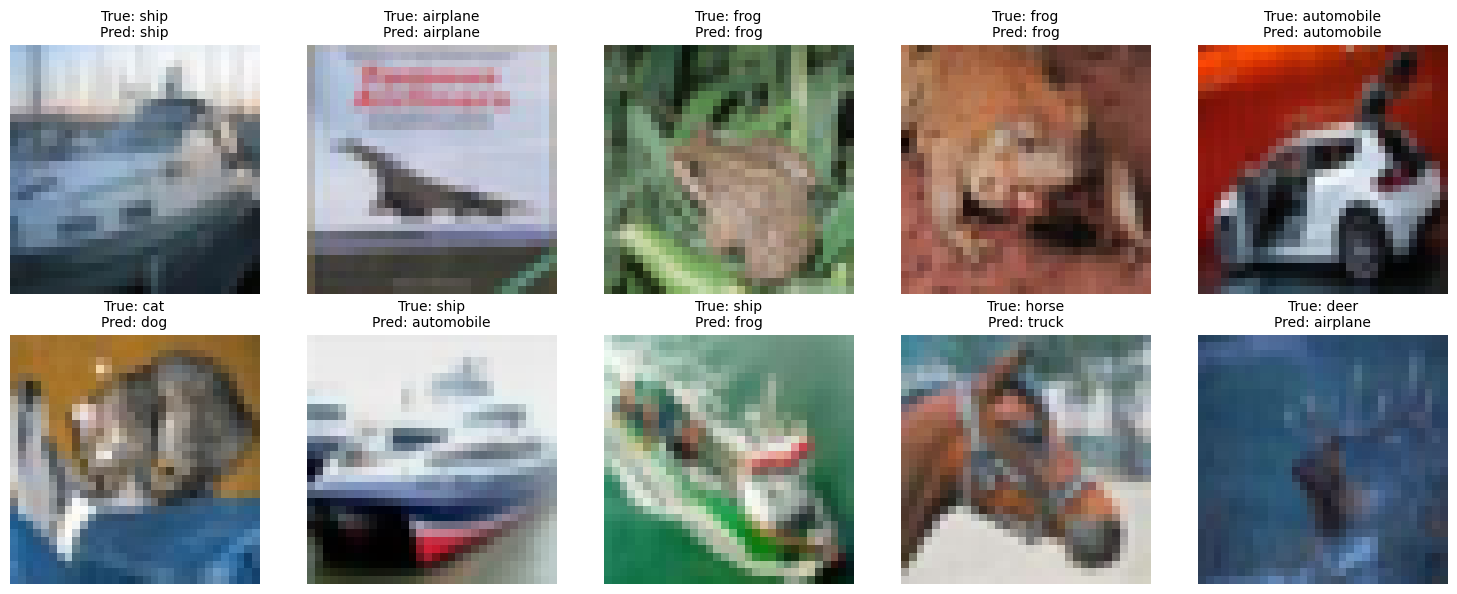

In [22]:
import matplotlib.pyplot as plt

def plot_classification_examples(original_images, y_true, y_pred, labels, correct_indices, incorrect_indices, n=5):

    fig, axes = plt.subplots(2, n, figsize=(15, 6))

    for i, idx in enumerate(correct_indices[:n]):
        ax = axes[0, i]
        ax.imshow(original_images[idx].squeeze(), cmap='viridis')
        ax.set_title(f"True: {labels[y_true[idx]]}\nPred: {labels[y_pred[idx]]}", fontsize=10)
        ax.axis('off')

    for i, idx in enumerate(incorrect_indices[:n]):
        ax = axes[1, i]
        ax.imshow(original_images[idx].squeeze(), cmap='viridis')
        ax.set_title(f"True: {labels[y_true[idx]]}\nPred: {labels[y_pred[idx]]}", fontsize=10)
        ax.axis('off')

    axes[0, 0].set_ylabel("Correct", size='large')
    axes[1, 0].set_ylabel("Incorrect", size='large')
    plt.tight_layout()
    plt.show()

correct_indices = np.where(test_predictions == y_test)[0]
misclassified_indices = np.where(test_predictions != y_test)[0]

print(f"Correctly classified examples: {len(correct_indices)}")
print(f"Misclassified examples: {len(misclassified_indices)}")

plot_classification_examples(
    original_images=x_test,
    y_true=y_test,
    y_pred=test_predictions,
    labels=labels,
    correct_indices=correct_indices,
    incorrect_indices=misclassified_indices,
    n=5
)


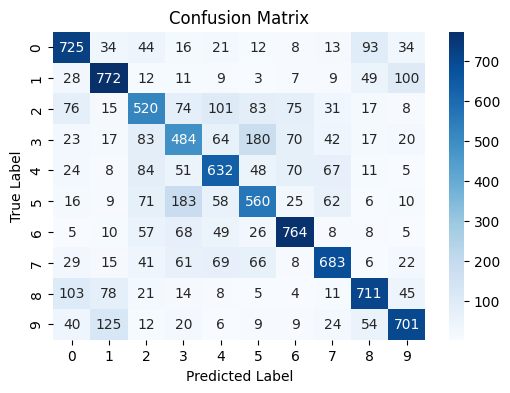

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

cm = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print("Classification Report:")
print(classification_report(y_test, test_predictions, target_names=labels))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.68      0.72      0.70      1000
  automobile       0.71      0.77      0.74      1000
        bird       0.55      0.52      0.53      1000
         cat       0.49      0.48      0.49      1000
        deer       0.62      0.63      0.63      1000
         dog       0.56      0.56      0.56      1000
        frog       0.73      0.76      0.75      1000
       horse       0.72      0.68      0.70      1000
        ship       0.73      0.71      0.72      1000
       truck       0.74      0.70      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.65      0.66      0.65     10000
weighted avg       0.65      0.66      0.65     10000



**EFFICIENT NET V2**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.models import Model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

X_train_prep = preprocess_input(X_train)
X_test_prep = preprocess_input(X_test)

start_time = time.time()
base_model = EfficientNetV2S(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

X_train_features = model.predict(X_train_prep)
X_test_features = model.predict(X_test_prep)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_pca)
X_test_norm = scaler.transform(X_test_pca)

svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm.fit(X_train_norm, y_train)

y_pred = svm.predict(X_test_norm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

end_time = time.time()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 94ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step
Test Accuracy: 0.6633


Correctly classified examples: 6552
Misclassified examples: 3448


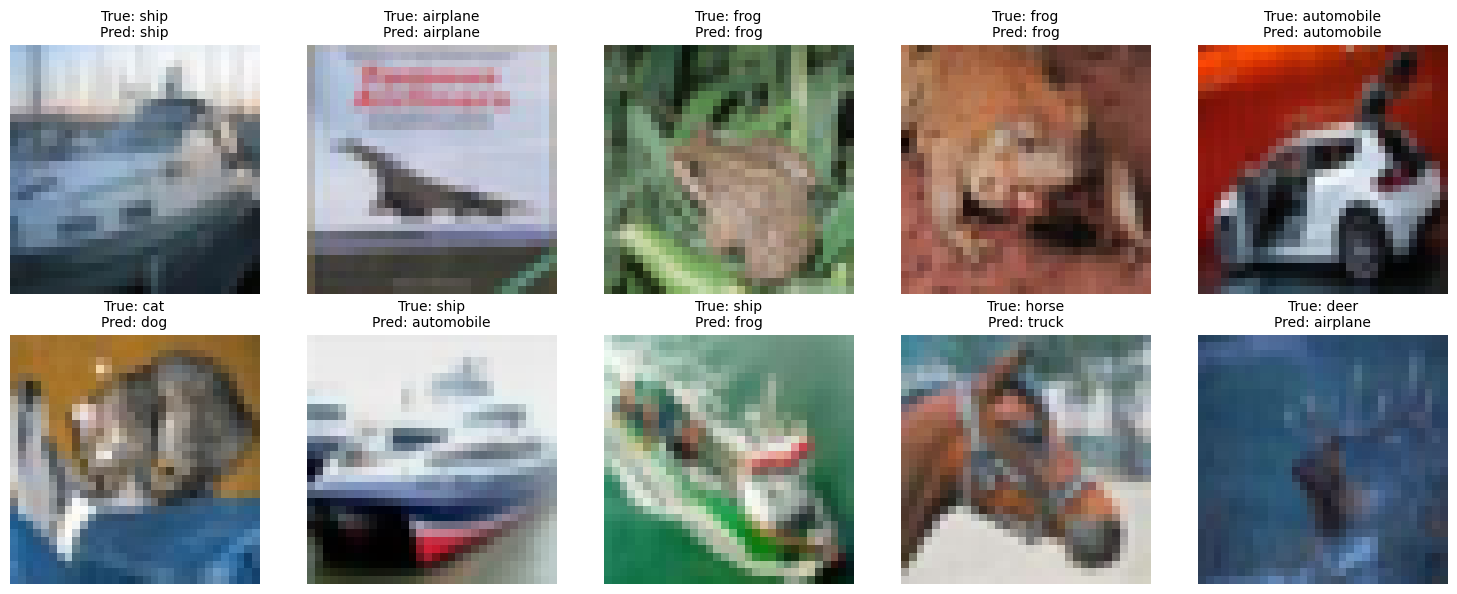

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_classification_examples(original_images, y_true, y_pred, labels, correct_indices, incorrect_indices, n=5):
    fig, axes = plt.subplots(2, n, figsize=(15, 6))

    for i, idx in enumerate(correct_indices[:n]):
        ax = axes[0, i]
        ax.imshow(original_images[idx].squeeze(), cmap='viridis')
        ax.set_title(f"True: {labels[y_true[idx]]}\nPred: {labels[y_pred[idx]]}", fontsize=10)
        ax.axis('off')

    for i, idx in enumerate(incorrect_indices[:n]):
        ax = axes[1, i]
        ax.imshow(original_images[idx].squeeze(), cmap='viridis')
        ax.set_title(f"True: {labels[y_true[idx]]}\nPred: {labels[y_pred[idx]]}", fontsize=10)
        ax.axis('off')

    axes[0, 0].set_ylabel("Correct", size='large')
    axes[1, 0].set_ylabel("Incorrect", size='large')

    plt.tight_layout()
    plt.show()

correct_indices = np.where(test_predictions == y_test)[0]
misclassified_indices = np.where(test_predictions != y_test)[0]

print(f"Correctly classified examples: {len(correct_indices)}")
print(f"Misclassified examples: {len(misclassified_indices)}")

plot_classification_examples(
    original_images=x_test,
    y_true=y_test,
    y_pred=test_predictions,
    labels=labels,
    correct_indices=correct_indices,
    incorrect_indices=misclassified_indices,
    n=5
)


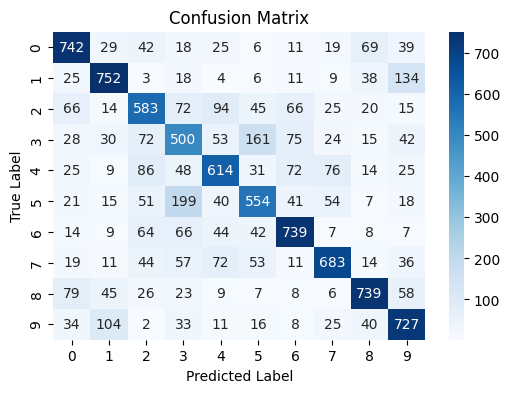

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.70      0.74      0.72      1000
  automobile       0.74      0.75      0.75      1000
        bird       0.60      0.58      0.59      1000
         cat       0.48      0.50      0.49      1000
        deer       0.64      0.61      0.62      1000
         dog       0.60      0.55      0.58      1000
        frog       0.71      0.74      0.72      1000
       horse       0.74      0.68      0.71      1000
        ship       0.77      0.74      0.75      1000
       truck       0.66      0.73      0.69      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

